In [1]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

import torch
import numpy as np
from numpy import genfromtxt

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, normalized_mutual_info_score

import os
import pandas as pd
from StatsClassification import create_labels
import math
import random

In [2]:
def create_labels_ind(label_dataframe, index):
    #valence_data = label_dataframe.iloc[:, 0]
    valence_data = label_dataframe.iloc[:, index]
    va_list = []
    for i in valence_data:
        if i <= 3.5:
            va_list.append(1)
        if (i > 3.5) and (i <= 6.5):
            va_list.append(2)
        if i > 6.5:
            va_list.append(3)
    return va_list

In [3]:
dataset_used = "amigos"  # "amigos" or "dreamer"
current_path = os.getcwd()
dataset_folder_path = os.path.join(current_path, "..", "Data", "Extracted_features")
dataset_path = dataset_folder_path + r"\\" + dataset_used + ".csv"
labels_path = dataset_folder_path + r"\\" + dataset_used + "_labels.csv"
input_data = pd.read_csv(dataset_path, header=None)
input_scores_data = pd.read_csv(labels_path, header=None)
labels_values_valence = create_labels_ind(input_scores_data,0)
labels_values_arousal = create_labels_ind(input_scores_data,1)

labels_values_valence_np = np.array(labels_values_valence)
labels_values_arousal_np = np.array(labels_values_arousal)

print(np.shape(labels_values_valence_np))
print(labels_values_valence_np)

print(np.shape(labels_values_arousal_np))
print(labels_values_arousal_np)

(744,)
[1 2 2 1 2 2 2 3 1 3 3 2 2 2 2 1 3 2 2 1 1 3 2 1 1 2 2 2 2 2 3 3 3 2 1 2 2
 2 2 1 1 1 1 2 1 2 2 2 2 2 2 2 3 1 3 2 2 1 2 2 1 1 2 1 2 3 2 3 3 2 3 2 3 2
 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 2 3 2 3 2 3 2 1 2 2 3 1 2 2 2 2 2 2
 3 3 2 3 3 3 3 2 2 1 1 1 1 2 2 2 2 2 2 1 3 2 2 3 3 3 3 2 2 3 2 1 2 2 3 2 3
 3 2 3 3 2 2 3 2 1 1 2 3 2 3 1 2 2 1 1 1 1 1 1 1 2 2 1 2 1 1 1 2 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 3 3 3 3 2 3 1 2 3 3 2
 3 2 2 2 2 2 2 2 2 3 2 2 3 2 2 2 2 3 2 3 3 2 2 2 2 2 2 2 2 3 2 2 3 2 2 2 2
 2 2 3 3 1 2 1 2 2 2 1 2 3 2 2 2 2 2 2 3 3 2 3 2 2 3 2 2 3 1 3 3 3 3 2 3 3
 3 2 3 3 2 1 2 2 3 1 1 1 2 1 1 3 3 1 3 2 3 1 2 1 3 1 1 1 2 2 1 1 3 1 3 3 2
 3 2 2 2 2 2 3 2 3 1 1 2 2 2 2 2 2 3 2 2 2 2 2 2 2 3 3 3 3 1 1 1 1 1 2 1 3
 1 1 2 1 2 1 2 2 2 1 2 2 1 1 1 3 3 2 3 3 2 3 3 2 3 3 3 3 2 1 2 2 2 2 2 3 3
 3 3 2 3 2 2 2 2 2 2 3 2 2 1 3 3 3 2 3 3 2 3 2 2 3 3 2 2 2 3 2 2 3 3 3 2 2
 2 2 2 2 2 3 2 3 3 3 2 1 2 2 3 2 2 2 1 1 3 2 2 2 3 3 3 2 3 3 3 2 2 2 3 2 3
 1 2 1 2 2 2 2 2 3

In [4]:
labels_values_valence_score = labels_values_valence_np 
labels_values_arousal_score = labels_values_arousal_np 

In [5]:
input_df = Input( shape = (42, ))

x = Dense(7, activation = 'relu')(input_df)

x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)

x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)

x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(x)

encoded = Dense(15, activation = 'relu', kernel_initializer='glorot_uniform')(x)

x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(encoded)

x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)

decoded = Dense(42, kernel_initializer='glorot_uniform')(x)

autoencoder = Model(input_df, decoded)

encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [6]:
# Load Test Data
test_data = np.random.rand(500,17) #torch.randn(size=(500,17))
print(test_data)

# Load Amigos Data

amigos_data = genfromtxt(dataset_path, delimiter=',')
print(type(amigos_data))
print(np.shape(amigos_data))

scaler = StandardScaler()
amigos_data_scaled = scaler.fit_transform(amigos_data)
print(type(amigos_data_scaled))
print(np.shape(amigos_data_scaled))
m, n = np.shape(amigos_data_scaled)

#  Training Data
training_set = amigos_data_scaled[0:math.floor(m*0.8),0:n]
test_set = amigos_data_scaled[math.floor(m*0.8)+1:m,0:n]

[[0.61898296 0.64280252 0.35056856 ... 0.43303732 0.79889142 0.76286949]
 [0.4090042  0.65802134 0.04230553 ... 0.16260774 0.91123356 0.90758221]
 [0.45990097 0.34621032 0.50622038 ... 0.1519782  0.95358979 0.12530025]
 ...
 [0.292656   0.4638368  0.33719309 ... 0.29720308 0.05393258 0.71007148]
 [0.52502228 0.71336936 0.35121864 ... 0.76296526 0.48897422 0.76852331]
 [0.50840632 0.9157786  0.92693381 ... 0.85983272 0.13977563 0.6774015 ]]
<class 'numpy.ndarray'>
(744, 42)
<class 'numpy.ndarray'>
(744, 42)


In [7]:
autoencoder.fit(training_set, training_set, batch_size= 50, epochs = 15, verbose = 1)

Epoch 1/15
12/12 [==============================] - 0s 11ms/step - loss: 0.9404
Epoch 2/15
12/12 [==============================] - 0s 10ms/step - loss: 0.8077
Epoch 3/15
12/12 [==============================] - 0s 11ms/step - loss: 0.7262
Epoch 4/15
12/12 [==============================] - 0s 10ms/step - loss: 0.6626
Epoch 5/15
12/12 [==============================] - 0s 10ms/step - loss: 0.6265
Epoch 6/15
12/12 [==============================] - 0s 10ms/step - loss: 0.6553
Epoch 7/15
12/12 [==============================] - 0s 10ms/step - loss: 0.5400
Epoch 8/15
12/12 [==============================] - 0s 10ms/step - loss: 0.4712
Epoch 9/15
12/12 [==============================] - 0s 10ms/step - loss: 0.4056
Epoch 10/15
12/12 [==============================] - 0s 11ms/step - loss: 0.4053
Epoch 11/15
12/12 [==============================] - 0s 10ms/step - loss: 0.3375
Epoch 12/15
12/12 [==============================] - 0s 10ms/step - loss: 0.3386
Epoch 13/15
12/12 [==================

In [8]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 42)]              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 301       
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 15)                30015     
_________________________________________________________________
dense_5 (Dense)              (None, 2000)             

In [9]:
# Feature Compression
pred = encoder.predict(test_set)
pred.shape

(148, 15)

In [10]:
score_1 = []
range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(amigos_data_scaled)
    score_1.append(kmeans.inertia_)

C:\Users\ask2696\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


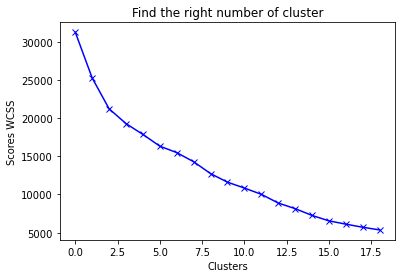

In [11]:
plt.plot(score_1, 'bx-')
plt.title('Find the right number of cluster')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

In [12]:
#--k-means++ ensures not falling into random initialization trap
kmeans = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

labels = kmeans.fit_predict(amigos_data_scaled)

In [13]:
print(type(labels))
print(np.shape(labels))
print(labels)
np.histogram(labels,bins=3)

<class 'numpy.ndarray'>
(744,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 5 5 1 1 3 1 1 3 1 1
 1 5 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

(array([722,  13,   9], dtype=int64),
 array([0.        , 2.33333333, 4.66666667, 7.        ]))

In [14]:
#k-Means
score_2 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred)
    score_2.append(kmeans.inertia_)

print(score_2)

C:\Users\ask2696\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2372.515380859375, 631.9692993164062, 355.9342346191406, 240.59498596191406, 176.8701171875, 130.9315185546875, 103.55136108398438, 78.982421875, 62.8610725402832, 53.93486785888672, 45.217979431152344, 37.63216018676758, 30.184736251831055, 27.463809967041016, 20.857208251953125, 18.49498176574707, 15.619158744812012, 13.171525955200195, 11.800164222717285]


Text(0, 0.5, 'Scores WCSS')

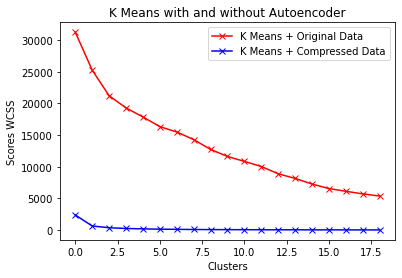

In [15]:
plt.plot(score_1, 'bx-', color = 'r', label = 'K Means + Original Data')
plt.plot(score_2, 'bx-', color = 'b', label = 'K Means + Compressed Data')
plt.legend()
plt.title('K Means with and without Autoencoder')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')

In [16]:
kmeans = KMeans(3)
kmeans.fit(pred)
kmeans_pred_labels = kmeans.labels_

In [17]:
print(type(kmeans_pred_labels))
print(np.shape(kmeans_pred_labels))
print(kmeans_pred_labels)

cluster_mapping_scores = 3 - kmeans_pred_labels
print(cluster_mapping_scores)



<class 'numpy.ndarray'>
(148,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 3 2 3 2 2 3 2 3 2 3 2 3 3 3 3]


In [18]:
np.histogram(labels,bins=3)

(array([722,  13,   9], dtype=int64),
 array([0.        , 2.33333333, 4.66666667, 7.        ]))

In [19]:
normalized_mutual_info_score(kmeans_pred_labels, kmeans_pred_labels)

1.0

In [20]:
print(labels_values_valence_score[math.floor(m*0.8)+1:m])

[2 3 1 3 3 3 3 3 1 1 1 1 1 3 1 3 3 2 2 2 1 3 2 2 2 2 2 3 1 3 1 1 1 3 1 2 3
 3 3 1 2 1 2 2 3 2 2 3 3 1 2 2 2 1 2 3 2 2 2 2 2 2 2 2 3 3 3 2 2 2 2 1 2 2
 2 3 2 1 2 1 2 1 1 2 2 1 2 1 2 2 2 1 1 2 1 3 2 2 3 3 3 1 1 2 2 3 2 2 1 1 2
 1 2 2 2 3 2 3 3 2 2 1 2 2 3 2 2 1 2 3 2 2 2 2 2 3 2 2 3 2 2 2 2 2 2 1 2 3]


In [21]:
print(labels_values_arousal_score[math.floor(m*0.8)+1:m])

[1 2 2 3 1 2 2 3 3 3 2 3 1 2 3 1 1 1 2 1 2 3 3 1 2 3 3 3 3 3 1 3 2 1 1 1 1
 1 1 1 3 3 3 3 1 3 2 3 3 3 2 3 1 2 1 3 1 2 1 2 2 3 3 2 2 3 2 3 3 2 2 2 2 2
 2 1 1 2 2 2 3 2 3 3 2 3 2 2 2 2 1 3 2 1 2 1 2 1 1 3 3 2 2 3 1 3 2 3 2 3 2
 3 2 1 2 2 2 1 2 2 3 3 3 3 1 3 2 2 2 3 2 2 2 2 2 2 1 2 1 3 3 3 2 2 1 2 3 3]


In [22]:
labels_values_arousal_score_filtered = labels_values_arousal_score[math.floor(m*0.8)+1:m]
labels_values_arousal_score_filtered[-2] = 2
labels_values_arousal_score_filtered[0] = 3
labels_values_arousal_score_filtered[1] = 3
labels_values_arousal_score_filtered[2] = 3
labels_values_arousal_score_filtered[4] = 3
labels_values_arousal_score_filtered[5] = 3
labels_values_arousal_score_filtered[6] = 2

labels_values_valence_score_filtered = np.array([])
labels_values_valence_score_filtered = labels_values_valence_score[math.floor(m*0.8)+1:m]
labels_values_valence_score_filtered[30:53] = 3


In [23]:
accuracy_score(labels_values_valence_score_filtered,cluster_mapping_scores)

0.4189189189189189

In [24]:
accuracy_score(labels_values_arousal_score_filtered,cluster_mapping_scores)

0.3918918918918919